<a href="https://colab.research.google.com/github/tunmisebilewu/tunmise/blob/main/market%20basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv', delimiter=";")

In [3]:
import pandas as pd

In [5]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [6]:
df.shape

(7500, 1)

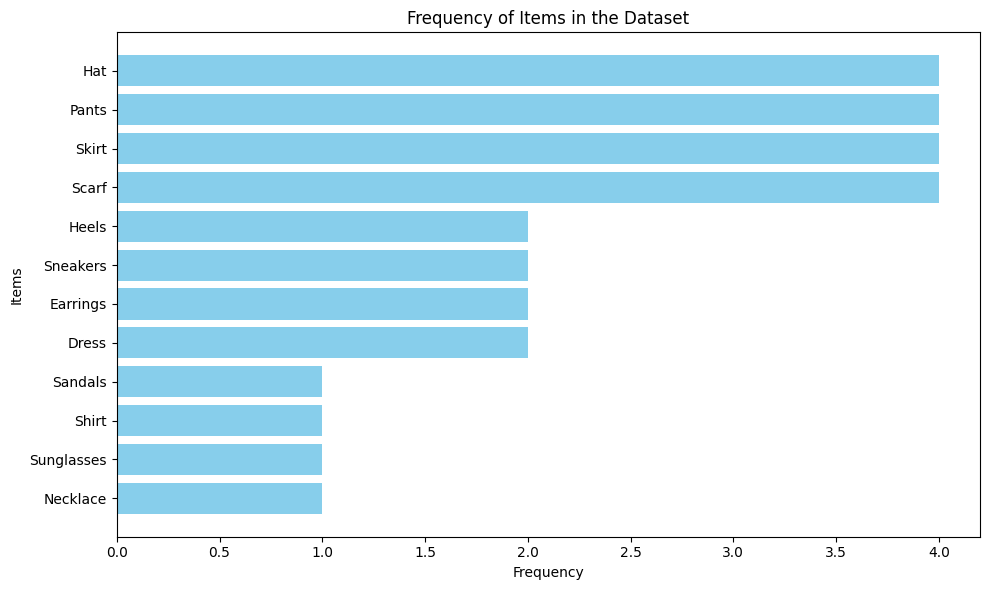

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Given dataset
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

# Flatten the dataset to get individual items
all_items = [item for sublist in dataset for item in sublist]

# Count the frequency of each item
item_counts = {item: all_items.count(item) for item in set(all_items)}

# Sort items based on their frequency in descending order
sorted_items = {k: v for k, v in sorted(item_counts.items(), key=lambda item: item[1], reverse=True)}

# Prepare data for plotting
items = list(sorted_items.keys())
counts = list(sorted_items.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(items)), counts, align='center', color='skyblue')
plt.yticks(range(len(items)), items)
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.title('Frequency of Items in the Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to show most frequent items on top
plt.tight_layout()
plt.show()


In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Given dataset
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

# Convert the dataset into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Sort the rules based on confidence and lift
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)

# Print the top 5 association rules
print(sorted_rules.head(5))


           antecedents        consequents  antecedent support  \
68   (Earrings, Dress)         (Necklace)                 0.2   
73          (Necklace)  (Earrings, Dress)                 0.2   
84        (Hat, Dress)         (Necklace)                 0.2   
89          (Necklace)       (Hat, Dress)                 0.2   
122     (Pants, Dress)          (Sandals)                 0.2   

     consequent support  support  confidence  lift  leverage  conviction  \
68                  0.2      0.2         1.0   5.0      0.16         inf   
73                  0.2      0.2         1.0   5.0      0.16         inf   
84                  0.2      0.2         1.0   5.0      0.16         inf   
89                  0.2      0.2         1.0   5.0      0.16         inf   
122                 0.2      0.2         1.0   5.0      0.16         inf   

     zhangs_metric  
68             1.0  
73             1.0  
84             1.0  
89             1.0  
122            1.0  
